In [3]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [4]:
import Script as sc

# Training set construction

In [5]:
cd ~/Desktop/Tesis/

/home/luis/Desktop/Tesis


In [8]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [56]:
# Dataframes directory 
f_f4 = "/home/luis/Desktop/Tesis/F4/CSVs/WellboreF4.csv"
f_f5 = "/home/luis/Desktop/Tesis/F5/CSVs/WellboreF5.csv"
f_f14 = "/home/luis/Desktop/Tesis/F14/CSVs/WellboreF14.csv"
files = [f_f4,f_f5,f_f14]

In [57]:
dfs = []
for file in files:
    df=pd.read_csv(file)
    dfs.append(df)

In [58]:
wells_txt = ["F4","F5","F14"]
F4 = dfs[0]
F5 = dfs[1]
F14 = dfs[2]
wells = [F4,F5,F14]
sections  =  ['All','All','All']

In [59]:
info = list(zip(wells_txt,sections))
info

[('F4', 'All'), ('F5', 'All'), ('F14', 'All')]

In [60]:
wells[1].drop(["ECD","an_Temp"],axis=1,inplace=True)

## Columns in wellbores dataframes

In [64]:
i = 0
for well in wells:
    print("\nWellbore:",wells_txt[i])
    print("Logs:\n",np.sort(well.columns.values))
    print("Shape:",well.shape)
    i+=1


Wellbore: F4
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']
Shape: (96202, 15)

Wellbore: F5
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']
Shape: (42364, 15)

Wellbore: F14
Logs:
 ['BPOS' 'BVEL' 'DEPT' 'DateTime' 'GR' 'HKLD' 'ROP5' 'RPM' 'Run' 'SPPA'
 'SWOB' 'Stick_RT' 'TFLO' 'TQA' 'Well']
Shape: (47499, 15)


In [66]:
cols = wells[0].columns.difference(["DateTime","Run","Well"])
cols

Index(['BPOS', 'BVEL', 'DEPT', 'GR', 'HKLD', 'ROP5', 'RPM', 'SPPA', 'SWOB',
       'Stick_RT', 'TFLO', 'TQA'],
      dtype='object')

## Continuity in wellbore logs?

BPOS


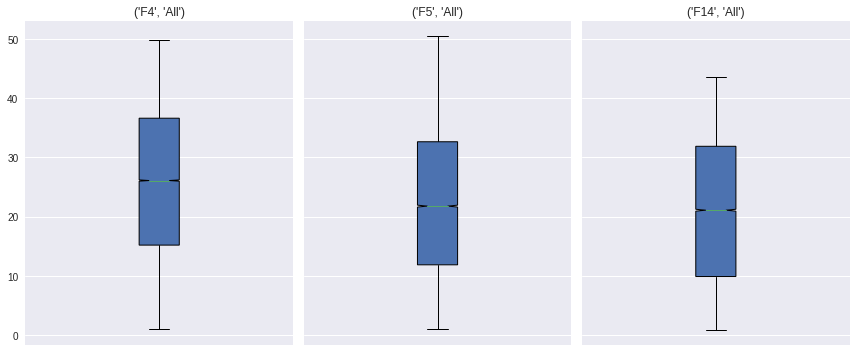

BVEL


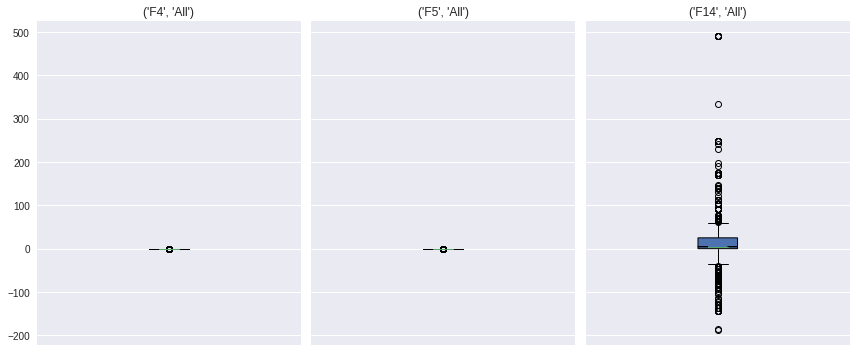

DEPT


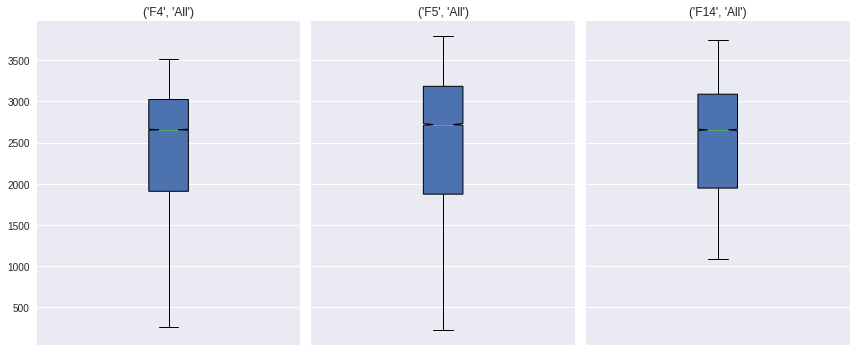

GR


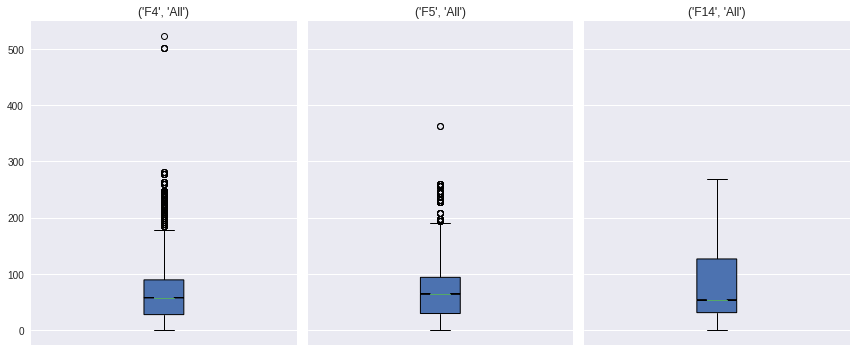

HKLD


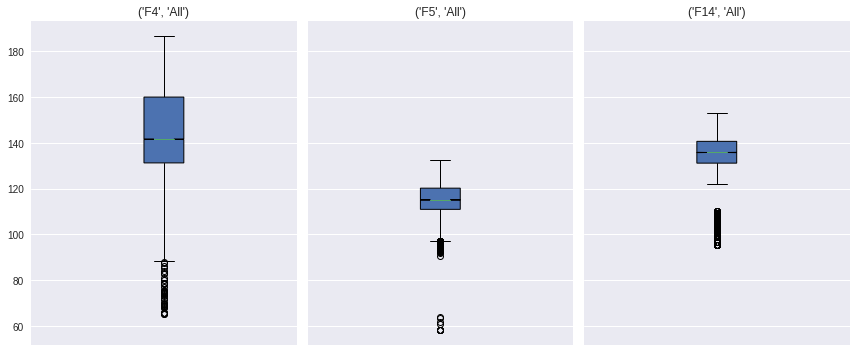

ROP5


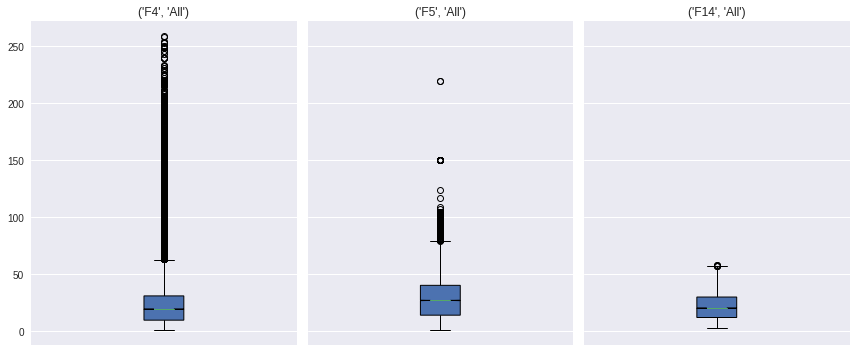

RPM


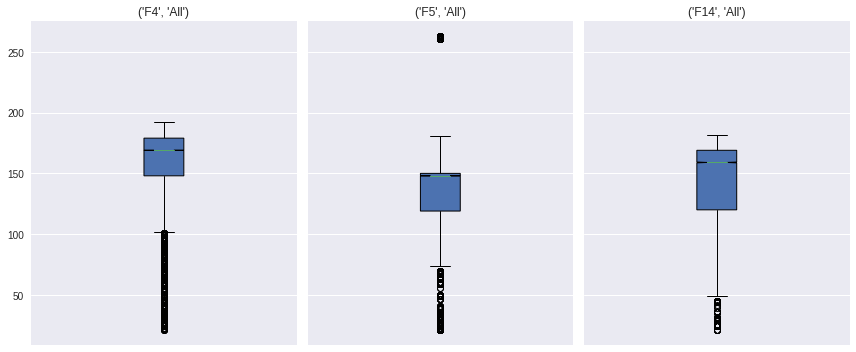

SPPA


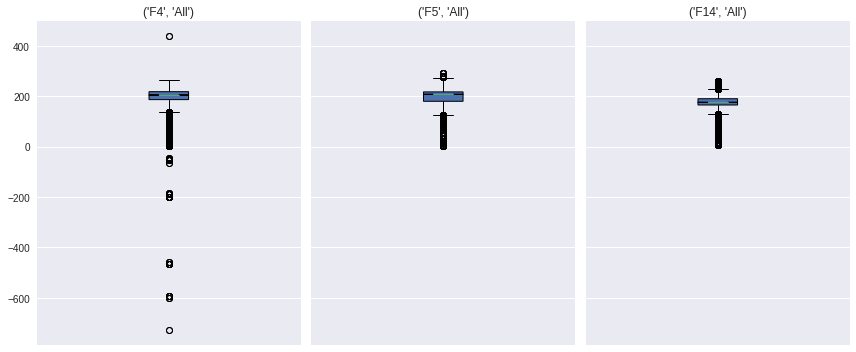

SWOB


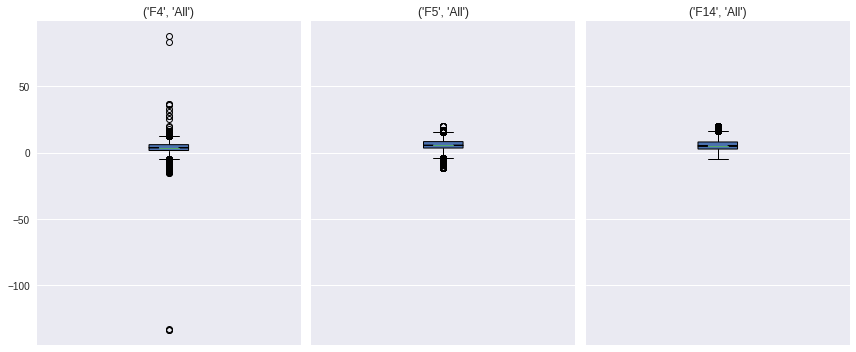

Stick_RT


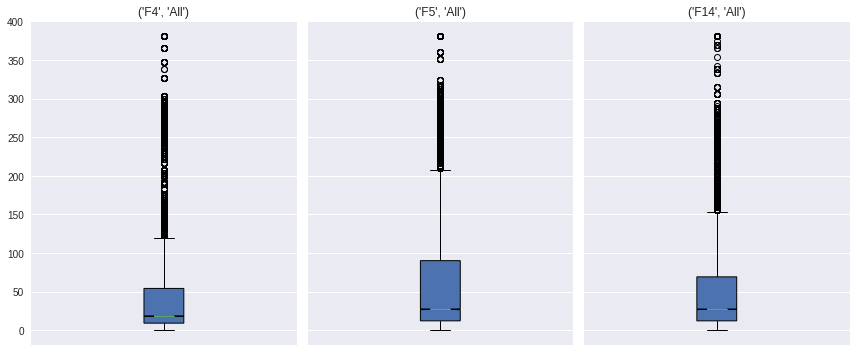

TFLO


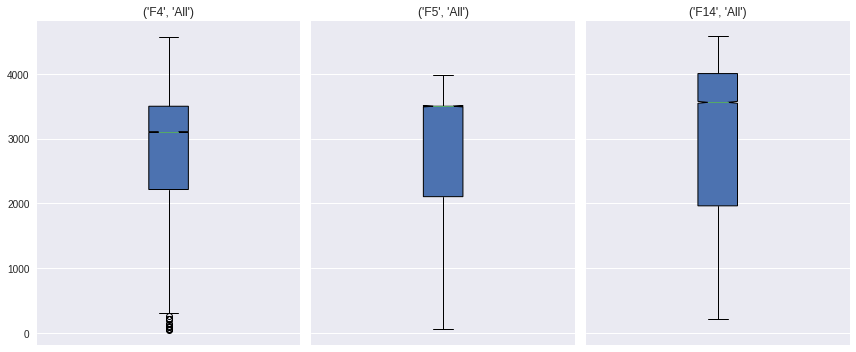

TQA


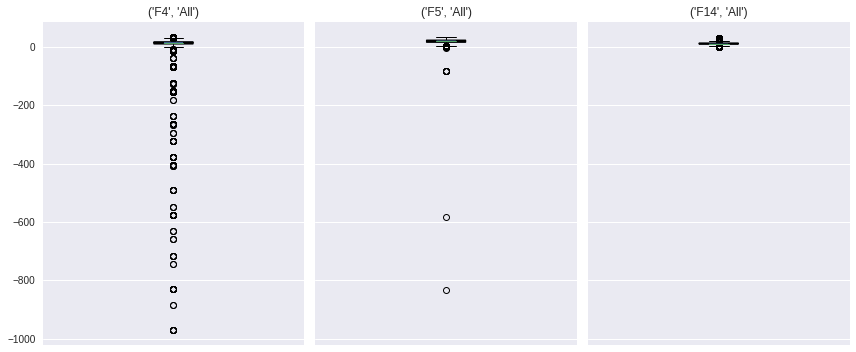

In [68]:
i = 0
for log in cols:
    sc.boxplt_logs(wells,cols[i],cols[i],info)
    i+=1

Further analysis must be done to check the `BVEL` variable

In [69]:
cols_new = np.sort(wells[0].columns.values)
cols_new

array(['BPOS', 'BVEL', 'DEPT', 'DateTime', 'GR', 'HKLD', 'ROP5', 'RPM',
       'Run', 'SPPA', 'SWOB', 'Stick_RT', 'TFLO', 'TQA', 'Well'],
      dtype=object)

In [70]:
wells_ordered = []
for well in wells:
    df = pd.DataFrame(well,columns=cols_new)
    wells_ordered.append(df)

In [71]:
df =pd.concat(wells_ordered)

In [73]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186065 entries, 0 to 47498
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   BPOS      186065 non-null  float64       
 1   BVEL      186065 non-null  float64       
 2   DEPT      186065 non-null  float64       
 3   DateTime  186065 non-null  datetime64[ns]
 4   GR        181333 non-null  float64       
 5   HKLD      186065 non-null  float64       
 6   ROP5      185378 non-null  float64       
 7   RPM       186065 non-null  float64       
 8   Run       186065 non-null  object        
 9   SPPA      186065 non-null  float64       
 10  SWOB      186065 non-null  float64       
 11  Stick_RT  174643 non-null  float64       
 12  TFLO      186065 non-null  float64       
 13  TQA       186065 non-null  float64       
 14  Well      186065 non-null  object        
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 22.7+ MB


In [76]:
df.to_csv(r"Notebooks-Git/TrainingV1.csv",index=False)